# Your first deep neural network

# Import required libraries

The code below imports the required libraries.
In case these are not available in the system they may be installed with the `pip` command.

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras --upgrade

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

# Data

The lab uses the CIFAR-10 dataset, a collection of 60,000 32 ×
32–pixel color images that comes bundled with Keras out of the box

## We load the CIFAR-10 dataset
- x_train and x_test are numpy arrays of shape
[50000, 32, 32, 3] and [10000, 32, 32, 3], respectively. 
- y_train and y_test are numpy arrays with shape [50000, 1] and [10000, 1], respectively, containing the integer labels in the range 0 to 9 for the class of each image.

In [3]:
NUM_CLASSES = 10

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(type((x_train)));print(x_train.shape)
print(type((y_train)));print(y_train.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
<class 'numpy.ndarray'>
(50000, 1)


By default the image data consists of integers between 0 and 255 for each pixel
channel. Neural networks work best when each input is inside the range –1 to 1,
so we need to divide by 255.

We also need to change the integer labeling of the images to one-hot-encoded
vectors. If the class integer label of an image is i, then its one-hot encoding is a
vector of length 10 (the number of classes) that has 0s in all but the ith element,
which is 1. The new shapes of y_train and y_test are therefore [50000, 10]
and [10000, 10] respectively.

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

It’s worth noting the shape of the image data in x_train: [50000, 32, 32, 3]. The
first dimension of this array references the index of the image in the dataset, the second
and third relate to the size of the image, and the last is the channel (i.e., red,
green, or blue, since these are RGB images). There are no columns or rows in this
dataset; instead, this is a tensor with four dimensions. For example, the following
entry refers to the green channel (1) value of the pixel in the (12,13) position of
image 54:

In [ ]:
x_train[54, 12, 13, 1] 

# Build the model

In Keras there are two ways to define the structure of your neural network: as a
Sequential model or using the Functional API.

The first chunk of code defines the architecture using a *sequential model* 

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential([
    Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(150, activation = 'relu'),
    Dense(10, activation = 'softmax'),
])

An alternative way to define the architechture using the Functional API is shown below

In [ ]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

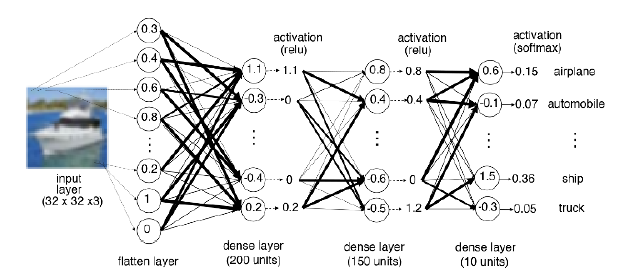

In our example, as required, the shape of our Input layer matches the shape of
x_train and the shape of our Dense output layer matches the shape of y_train. To
illustrate this, we can use the model.summary() method to see the shape of the network
at each layer

In [ ]:
model.summary()

# Build the model

In [ ]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

To train the model, simply call the fit method, as shown here
- The raw image data.
- The one-hot-encoded class labels.
- The batch_size determines how many observations will be passed to the network
at each training step.
- The epochs determine how many times the network will be shown the full training
data.
- If shuffle = True, the batches will be drawn randomly without replacement
from the training data at each training step.

In [ ]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

# Model Evaluation

The output from this method is a list of the metrics we are monitoring: categorical
cross-entropy and accuracy.

In [ ]:
model.evaluate(x_test, y_test)

We can view some of the predictions on the test set using the predict method:

In [ ]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

In [ ]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
